In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [3]:
data = pd.read_csv('D:\Master_Folder\Data Science Course\Projects\StockMarket\stock_data\SUZLON.NS_2023-01-01_to_2024-11-21.csv', usecols=['Date', 'Day', 'Weekday', 'Month', 'Year', 'Close', 'Adj Close', 'Adj_Close_Lag_1', 'Adj_Close_Lag_2', 'Adj_Close_Lag_3', 'Upward_Downward_Probability'])

In [4]:
data.head()

,Date,Day,Weekday,Month,Year,Close,Adj Close,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Upward_Downward_Probability
0,2023-03-17,17,4,3,2023,8.00,8.00,7.90,7.95,7.95,-2.639057
1,2023-03-20,20,0,3,2023,7.75,7.75,8.00,7.90,7.95,-2.639057
2,2023-03-21,21,1,3,2023,7.80,7.80,7.75,8.00,7.90,-2.639057
3,2023-03-22,22,2,3,2023,7.80,7.80,7.80,7.75,8.00,-2.639057
4,2023-03-23,23,3,3,2023,7.75,7.75,7.80,7.80,7.75,-2.639057


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         411 non-null    object 
 1   Day                          411 non-null    int64  
 2   Weekday                      411 non-null    int64  
 3   Month                        411 non-null    int64  
 4   Year                         411 non-null    int64  
 5   Close                        411 non-null    float64
 6   Adj Close                    411 non-null    float64
 7   Adj_Close_Lag_1              411 non-null    float64
 8   Adj_Close_Lag_2              411 non-null    float64
 9   Adj_Close_Lag_3              411 non-null    float64
 10  Upward_Downward_Probability  411 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 35.4+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

C:\Users\Arbaz Khan\AppData\Local\Temp\ipykernel_20056\2675603959.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 411 entries, 2023-03-17 to 2024-11-19
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day                          411 non-null    int64  
 1   Weekday                      411 non-null    int64  
 2   Month                        411 non-null    int64  
 3   Year                         411 non-null    int64  
 4   Close                        411 non-null    float64
 5   Adj Close                    411 non-null    float64
 6   Adj_Close_Lag_1              411 non-null    float64
 7   Adj_Close_Lag_2              411 non-null    float64
 8   Adj_Close_Lag_3              411 non-null    float64
 9   Upward_Downward_Probability  411 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 35.3 KB


In [8]:
data.head()

,Day,Weekday,Month,Year,Close,Adj Close,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Upward_Downward_Probability
Date,,,,,,,,,,
2023-03-17,17,4,3,2023,8.00,8.00,7.90,7.95,7.95,-2.639057
2023-03-20,20,0,3,2023,7.75,7.75,8.00,7.90,7.95,-2.639057
2023-03-21,21,1,3,2023,7.80,7.80,7.75,8.00,7.90,-2.639057
2023-03-22,22,2,3,2023,7.80,7.80,7.80,7.75,8.00,-2.639057
2023-03-23,23,3,3,2023,7.75,7.75,7.80,7.80,7.75,-2.639057


In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns to scale
columns_to_scale = ['Day', 'Weekday', 'Month', 'Year', 'Adj Close', 
                    'Adj_Close_Lag_1', 'Adj_Close_Lag_2', 
                    'Adj_Close_Lag_3', 'Upward_Downward_Probability']

# Fit and transform the data (assumes 'data' is a DataFrame)
scaled_data = scaler.fit_transform(data[columns_to_scale])

# Created a new Dataframe with scaled values and retain column names
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=data.index)

# Concatenate the scaled data with the 'Close' column
refined_data = pd.concat([data[['Close']], scaled_df], axis=1)

In [12]:
refined_data.head()

,Close,Day,Weekday,Month,Year,Adj Close,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Upward_Downward_Probability
Date,,,,,,,,,,
2023-03-17,8.00,0.137797,1.414264,-1.227242,-1.062795,-1.468235,-1.464870,-1.454490,-1.446435,-2.520329
2023-03-20,7.75,0.478971,-1.428096,-1.227242,-1.062795,-1.479848,-1.460230,-1.456807,-1.446435,-2.520329
2023-03-21,7.80,0.592695,-0.717506,-1.227242,-1.062795,-1.477526,-1.471829,-1.452174,-1.448747,-2.520329
2023-03-22,7.80,0.706419,-0.006916,-1.227242,-1.062795,-1.477526,-1.469509,-1.463755,-1.444123,-2.520329
2023-03-23,7.75,0.820144,0.703674,-1.227242,-1.062795,-1.479848,-1.469509,-1.461439,-1.455683,-2.520329


In [13]:
refined_data.describe()

,Close,Day,Weekday,Month,Year,Adj Close,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Upward_Downward_Probability
count,411.000000,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02
mean,39.605839,5.942800e-17,-1.836865e-17,8.644072e-17,-5.414647e-14,-6.915258e-17,-6.915258e-17,2.074577e-16,2.074577e-16,-3.457629e-17
std,21.552659,1.001219e+00,1.001219e+00,1.001219e+00,1.001219e+00,1.001219e+00,1.001219e+00,1.001219e+00,1.001219e+00,1.001219e+00
min,7.050000,-1.681793e+00,-1.428096e+00,-1.881029e+00,-1.062795e+00,-1.512366e+00,-1.504306e+00,-1.496181e+00,-1.488052e+00,-2.576770e+00
25%,20.225000,-8.857221e-01,-7.175057e-01,-9.003486e-01,-1.062795e+00,-9.003279e-01,-8.976874e-01,-8.951393e-01,-8.915391e-01,-1.680136e-01
50%,39.650000,2.407305e-02,-6.915718e-03,8.033146e-02,9.409150e-01,2.051459e-03,5.860934e-03,1.163487e-02,7.854271e-03,2.836169e-01
75%,52.810000,8.201438e-01,7.036743e-01,7.341182e-01,9.409150e-01,6.133932e-01,5.646923e-01,5.121557e-01,5.044859e-01,7.429380e-01
max,84.700000,1.729939e+00,1.414264e+00,1.714798e+00,9.409150e-01,2.094828e+00,2.098289e+00,2.100805e+00,2.102585e+00,1.797537e+00


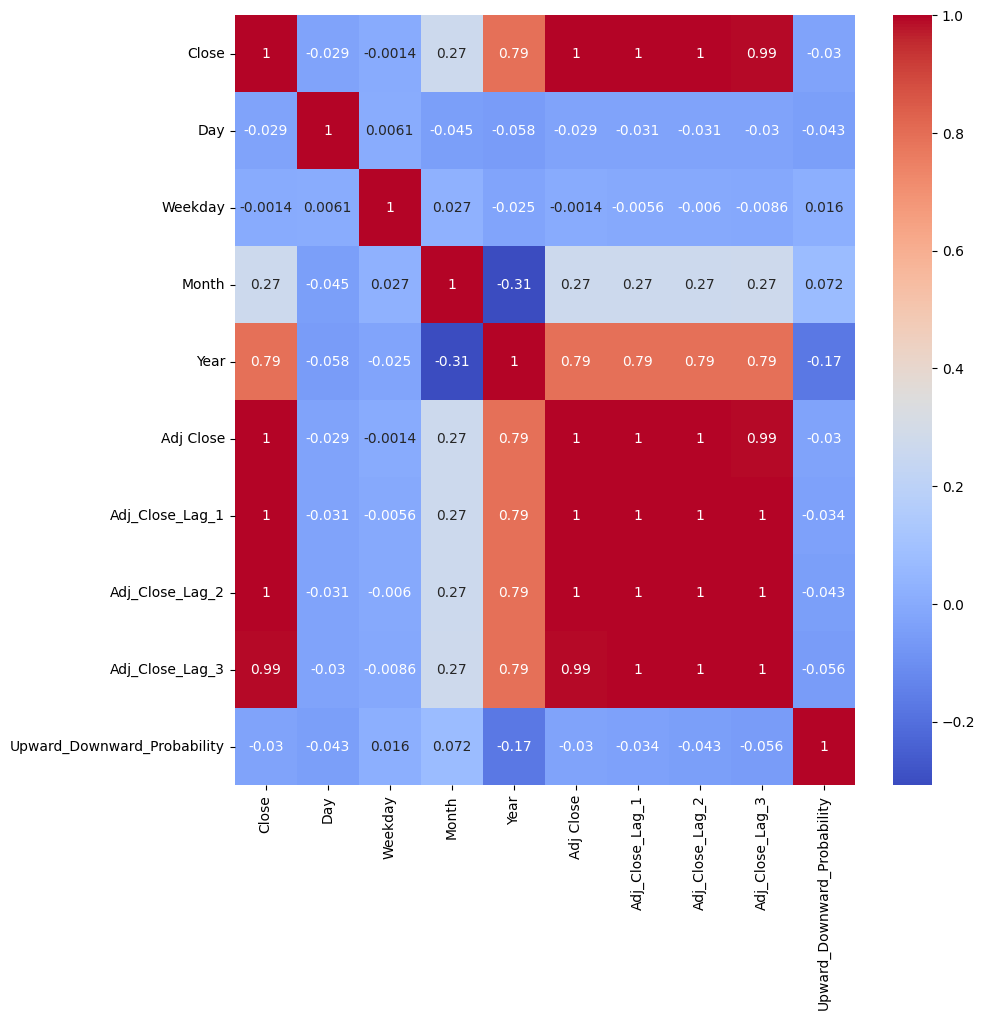

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) 
sns.heatmap(refined_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
# creating groups of similar data
group_1 = refined_data[['Day', 'Weekday', 'Month', 'Year']]
group_2 = refined_data[['Adj Close', 'Adj_Close_Lag_1', 'Adj_Close_Lag_2', 'Adj_Close_Lag_3']]

# Apply PCA to group 1
pca_group_1 = PCA(n_components=1)

refined_data['Temporal_Features'] = pca_group_1.fit_transform(group_1)
# group_1_pca = pca_group_1.fit_transform(group_1)
# group_1_pca = pd.DataFrame(group_1_pca, columns=['Temporal_Features'])

# Apply PCA to group 2
pca_group_2 = PCA(n_components=1)

refined_data['Price_Features'] = pca_group_2.fit_transform(group_2)
# group_2_pca = pca_group_2.fit_transform(group_2)
# group_2_pca = pd.DataFrame(group_2_pca, columns=['Price_Features'])

# Combine the PCA results with the remaining features
# pca_data = pd.concat([group_1_pca, group_2_pca, scaled_data[['Upward_Downward_Probability']].reset_index(drop=True)], axis=1)
# pca_data.index = scaled_data.index

refined_data.drop(columns=['Day', 'Weekday', 'Month', 'Year', 'Adj Close', 'Adj_Close_Lag_1', 'Adj_Close_Lag_2', 'Adj_Close_Lag_3'], inplace=True)

print("Explained Variance Ratio (Group 1 Temporal features):", pca_group_1.explained_variance_ratio_)
print("Explained Variance Ratio (Group 2 Price Features):", pca_group_2.explained_variance_ratio_)
print(refined_data.head())


Explained Variance Ratio (Group 1 Temporal features): [0.3282166]
Explained Variance Ratio (Group 2 Price Features): [0.99749558]
            Close  Upward_Downward_Probability  Temporal_Features  \
Date                                                                
2023-03-17   8.00                    -2.520329          -0.059697   
2023-03-20   7.75                    -2.520329           0.261311   
2023-03-21   7.80                    -2.520329           0.174668   
2023-03-22   7.80                    -2.520329           0.088026   
2023-03-23   7.75                    -2.520329           0.001383   

            Price_Features  
Date                        
2023-03-17       -2.917016  
2023-03-20       -2.921657  
2023-03-21       -2.925137  
2023-03-22       -2.927459  
2023-03-23       -2.933238  


In [16]:
refined_data.sample(20)

,Close,Upward_Downward_Probability,Temporal_Features,Price_Features
Date,,,,
2024-04-19,39.35,-2.576770,1.115572,0.094768
2023-12-18,37.85,-0.155803,-1.789297,-0.132325
2024-03-01,44.30,-0.155803,1.409960,0.455223
2024-06-24,54.70,0.595804,0.971963,1.148079
2023-06-22,13.60,0.242011,-0.680936,-2.346920
2023-06-06,12.20,0.742938,-0.456526,-2.593652
2024-04-05,42.65,-0.779287,1.166696,0.323115
2023-08-16,20.25,1.230494,-1.033348,-1.777898
2024-03-19,37.15,-2.576770,1.593201,-0.081426


In [17]:
refined_data.describe()

,Close,Upward_Downward_Probability,Temporal_Features,Price_Features
count,411.000000,4.110000e+02,4.110000e+02,4.110000e+02
mean,39.605839,-3.457629e-17,-1.383052e-16,-2.766103e-16
std,21.552659,1.001219e+00,1.147200e+00,1.999928e+00
min,7.050000,-2.576770e+00,-2.161430e+00,-2.969208e+00
25%,20.225000,-1.680136e-01,-9.067381e-01,-1.795247e+00
50%,39.650000,2.836169e-01,-5.387021e-02,3.478893e-02
75%,52.810000,7.429380e-01,9.153315e-01,1.093043e+00
max,84.700000,1.797537e+00,2.199237e+00,4.065909e+00


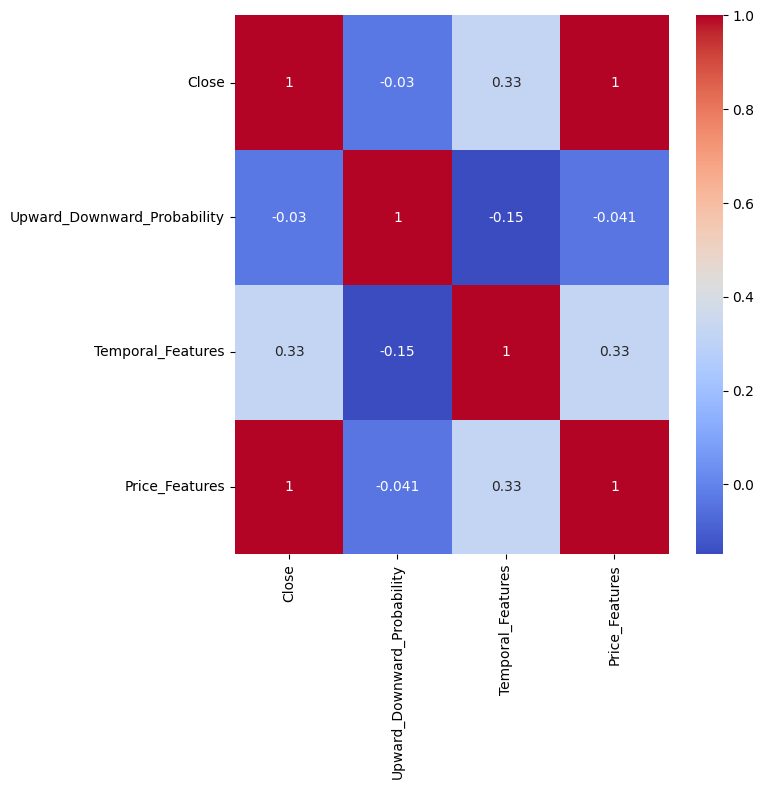

In [18]:
plt.figure(figsize=(7, 7)) 
sns.heatmap(refined_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
# Prepare the data for Anamoly\clustering
features = refined_data[['Temporal_Features', 'Price_Features', 'Upward_Downward_Probability']]


In [20]:
# Use K-Means with predefined 3 clusters (bullish, bearish, neutral)
kmeans = KMeans(n_clusters=3, random_state=42)
refined_data['Cluster'] = kmeans.fit_predict(features)

In [21]:
# Anomaly Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the data and predict anomalies (-1 for anomalies, 1 for normal points)
refined_data['Anomaly'] = iso_forest.fit_predict(features)

In [22]:
refined_data['Anomaly'].value_counts()

Anomaly
 1    390
-1     21
Name: count, dtype: int64

In [23]:
refined_data.sample(20)

,Close,Upward_Downward_Probability,Temporal_Features,Price_Features,Cluster,Anomaly
Date,,,,,,
2023-05-02,8.10,-0.693095,-0.213262,-2.893839,2,1
2024-01-02,38.25,0.283617,2.112595,-0.105658,1,1
2023-11-06,35.95,0.420279,-1.516819,-0.544603,0,1
2024-01-09,43.55,0.373183,2.087033,0.180868,1,1
2023-11-22,37.35,0.283617,-1.741229,0.060916,0,1
2024-02-26,43.75,-0.155803,1.879287,0.476032,1,1
2024-08-22,77.57,0.283617,0.272980,3.682626,1,1
2023-04-12,8.10,-0.693095,-0.104114,-2.901952,2,1
2023-06-19,14.55,1.076654,-0.421008,-2.306290,2,1


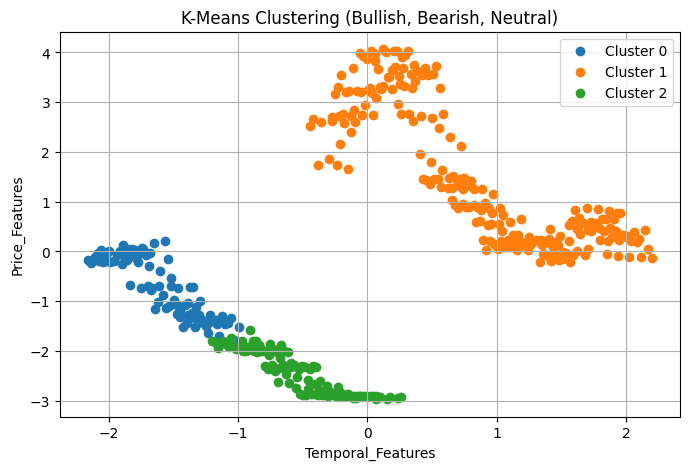

In [24]:
# Visualize the clusters (using the first two features)
plt.figure(figsize=(8, 5))
for cluster in range(3):  # 3 clusters: bullish, bearish, neutral
    cluster_data = refined_data[refined_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Temporal_Features'], cluster_data['Price_Features'], label=f'Cluster {cluster}')
plt.title('K-Means Clustering (Bullish, Bearish, Neutral)')
plt.xlabel('Temporal_Features')
plt.ylabel('Price_Features')
plt.legend()
plt.grid()
plt.show()

In [25]:
# Assuming you have clustered the data already
cluster_centers = kmeans.cluster_centers_

# You can inspect the centers of the clusters to understand their nature
print("Cluster Centers (Mean values of each cluster's features):")
print(cluster_centers)

# You can also inspect the data points within each cluster
for cluster in range(3):  # Loop through the 3 clusters
    cluster_data = refined_data[refined_data['Cluster'] == cluster]
    print(f"Cluster {cluster} Statistics:")
    print(cluster_data[['Temporal_Features', 'Price_Features', 'Upward_Downward_Probability']].describe())


Cluster Centers (Mean values of each cluster's features):
[[-1.57972244 -0.71613157  0.41308597]
 [ 0.87002886  1.48918681 -0.16045378]
 [-0.50289872 -2.45846177 -0.0051072 ]]
Cluster 0 Statistics:
       Temporal_Features  Price_Features  Upward_Downward_Probability
count          86.000000       86.000000                    86.000000
mean           -1.579722       -0.716132                     0.413086
std             0.305987        0.601989                     0.428356
min            -2.161430       -1.777898                    -0.168014
25%            -1.827108       -1.291479                     0.242011
50%            -1.576276       -0.722696                     0.283617
75%            -1.352731       -0.121055                     0.742938
max            -0.997830        0.199190                     1.230494
Cluster 1 Statistics:
       Temporal_Features  Price_Features  Upward_Downward_Probability
count         218.000000      218.000000                   218.000000
mean      